# Prediksi Tuberkulosis Menggunakan Artificial Neural Network (ANN)
## Metodologi: CRISP-DM

Notebook ini mengimplementasikan enam tahapan utama CRISP-DM:
1. Business Understanding  
2. Data Understanding  
3. Data Preparation  
4. Modeling  
5. Evaluation  
6. Deployment


## 1. Business Understanding

Tujuan dari penelitian ini adalah membangun model klasifikasi untuk memprediksi
apakah seorang pasien berpotensi menderita tuberkulosis (TBC) berdasarkan
gejala dan informasi pendukung lainnya.

Manfaat yang diharapkan:
- Membantu proses screening awal TBC.
- Mendukung tenaga kesehatan dalam pengambilan keputusan.
- Mengurangi waktu dan biaya pemeriksaan lanjutan yang tidak perlu.


## 2. Data Understanding

In [56]:
# 2. DATA UNDERSTANDING

# ==========================================
# BAGIAN IMPORT LIBRARY (VERSI VS CODE + VENV)
# ==========================================

import sys
print("Python:", sys.version)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import joblib

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

print("TensorFlow:", tf.__version__)
print("NumPy:", np.__version__)


# Baca dataset (separator ; sesuai file kamu)
df = pd.read_csv('tuberculosis_labeled.csv', sep=';')

# Lihat 5 baris pertama
df.head()


Python: 3.10.19 (main, Nov 21 2025, 10:27:29) [Clang 14.0.3 (clang-1403.0.22.14.1)]
TensorFlow: 2.15.0
NumPy: 1.23.5


,CO,NS,BD,FV,CP,SP,IS,LP,CH,LC,IR,LA,LE,LN,SB,BMI,Prediksi
0,0,2,2,1,2,0,1,1,1,2,2,1,1,1,0,0,Ya
1,0,0,2,0,1,1,0,1,0,2,2,0,0,0,2,1,Tidak
2,1,1,2,0,2,0,1,2,2,2,0,1,0,2,2,0,Tidak
3,0,0,1,2,0,0,1,0,0,1,1,0,1,1,1,0,Tidak
4,1,2,1,1,0,2,2,1,0,1,2,0,2,0,1,1,Ya


In [57]:
#Cek struktur & distribusi label

# Info struktur data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   CO        492 non-null    int64 
 1   NS        492 non-null    int64 
 2   BD        492 non-null    int64 
 3   FV        492 non-null    int64 
 4   CP        492 non-null    int64 
 5   SP        492 non-null    int64 
 6   IS        492 non-null    int64 
 7   LP        492 non-null    int64 
 8   CH        492 non-null    int64 
 9   LC        492 non-null    int64 
 10  IR        492 non-null    int64 
 11  LA        492 non-null    int64 
 12  LE        492 non-null    int64 
 13  LN        492 non-null    int64 
 14  SB        492 non-null    int64 
 15  BMI       492 non-null    int64 
 16  Prediksi  492 non-null    object
dtypes: int64(16), object(1)
memory usage: 65.5+ KB


In [58]:
# Statistik deskriptif fitur numerik
df.describe()


,CO,NS,BD,FV,CP,SP,IS,LP,CH,LC,IR,LA,LE,LN,SB,BMI
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000
mean,2.038618,1.054878,1.079268,1.016260,1.020325,0.997967,2.028455,1.058943,1.063008,1.022358,1.026423,0.989837,2.048780,1.044715,1.079268,1.010163
std,0.822626,0.788820,0.799578,0.836867,0.807042,0.808557,0.836540,0.791105,0.801026,0.835508,0.810643,0.808495,0.808344,0.788172,0.804656,0.833305
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
75%,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000
max,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000


In [59]:
# Distribusi label
df['Prediksi'].value_counts()


Prediksi
Ya       333
Tidak    159
Name: count, dtype: int64

## 3. Data Preparation

Tahapan yang dilakukan:
- Memisahkan fitur (X) dan label (y).
- Meng-encode label `Prediksi` dari teks (`"Ya"`, `"Tidak"`) menjadi angka (0/1).
- Membagi data menjadi data latih dan data uji.
- Melakukan standarisasi fitur (scaling) untuk membantu proses training ANN.


In [60]:
# Pisahkan fitur (semua kolom kecuali Prediksi) dan label (Prediksi)
X = df.drop('Prediksi', axis=1)
y = df['Prediksi']

# Encode label: "Tidak" -> 0, "Ya" -> 1 (sesuai urutan alfabet)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Kelas label:", le.classes_)  # Harusnya ['Tidak' 'Ya']


Kelas label: ['Tidak' 'Ya']


In [61]:
# Bagi data menjadi train dan test (stratify supaya proporsi label seimbang)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

X_train.shape, X_test.shape


((393, 16), (99, 16))

In [62]:
# Standarisasi fitur (mean=0, std=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


## 4. Modeling

Pada tahap ini dibangun model klasifikasi menggunakan Artificial Neural Network (ANN)
dengan arsitektur sebagai berikut (bisa kamu sesuaikan di laporan):

- Input layer: jumlah neuron = jumlah fitur (kolom selain `Prediksi`).
- Hidden layer 1: Dense 32 neuron, aktivasi ReLU + Dropout 0.2.
- Hidden layer 2: Dense 16 neuron, aktivasi ReLU + Dropout 0.2.
- Output layer: Dense 1 neuron, aktivasi sigmoid (untuk klasifikasi biner).

Fungsi loss: `binary_crossentropy`  
Optimizer: `adam`  
Metrik evaluasi utama: `accuracy`.


In [63]:
input_dim = X_train_scaled.shape[1]

model = Sequential()

# Hidden layer 1 (sedang)
model.add(Dense(24, input_dim=input_dim, activation='relu'))
model.add(Dropout(0.25))

# Hidden layer 2 (sedang)
model.add(Dense(12, activation='relu'))
model.add(Dropout(0.20))

# Output layer
model.add(Dense(1, activation='sigmoid'))

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 24)                408       
                                                                 
 dropout_8 (Dropout)         (None, 24)                0         
                                                                 
 dense_13 (Dense)            (None, 12)                300       
                                                                 
 dropout_9 (Dropout)         (None, 12)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 13        
                                                                 
Total params: 721 (2.82 KB)
Trainable params: 721 (2.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [64]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=8,
    restore_best_weights=True
)

history = model.fit(
    X_train_scaled,
    y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=60,      # Tidak terlalu banyak
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/60
25/25 [==============================] - 2s 16ms/step - loss: 0.7806 - accuracy: 0.5216 - val_loss: 0.6775 - val_accuracy: 0.5657
Epoch 2/60
25/25 [==============================] - 0s 5ms/step - loss: 0.6760 - accuracy: 0.6031 - val_loss: 0.5810 - val_accuracy: 0.6263
Epoch 3/60
25/25 [==============================] - 0s 5ms/step - loss: 0.5954 - accuracy: 0.6641 - val_loss: 0.5142 - val_accuracy: 0.6869
Epoch 4/60
25/25 [==============================] - 0s 6ms/step - loss: 0.4902 - accuracy: 0.7303 - val_loss: 0.4669 - val_accuracy: 0.6970
Epoch 5/60
25/25 [==============================] - 0s 6ms/step - loss: 0.4773 - accuracy: 0.7481 - val_loss: 0.4225 - val_accuracy: 0.7677
Epoch 6/60
25/25 [==============================] - 0s 6ms/step - loss: 0.4221 - accuracy: 0.7888 - val_loss: 0.3756 - val_accuracy: 0.8081
Epoch 7/60
25/25 [==============================] - 0s 5ms/step - loss: 0.3603 - accuracy: 0.8295 - val_loss: 0.3331 - val_accuracy: 0.8384
Epoch 8/60
25/25 [=

## 5. Evaluation

Tahap ini mengevaluasi performa model menggunakan data uji dengan metrik:
- Akurasi
- Classification report (precision, recall, f1-score)
- Confusion matrix
- Kurva loss dan akurasi selama training


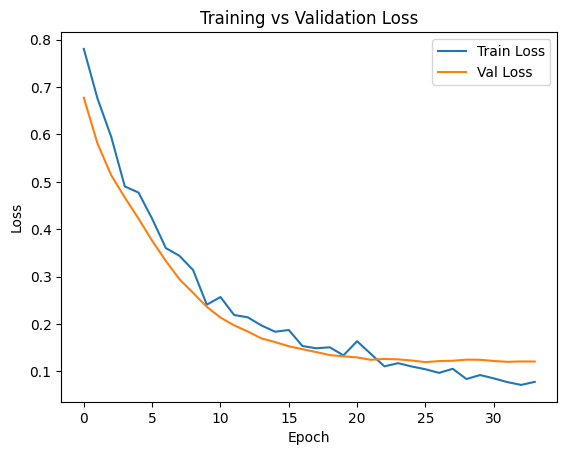

In [65]:
# Plot loss
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()


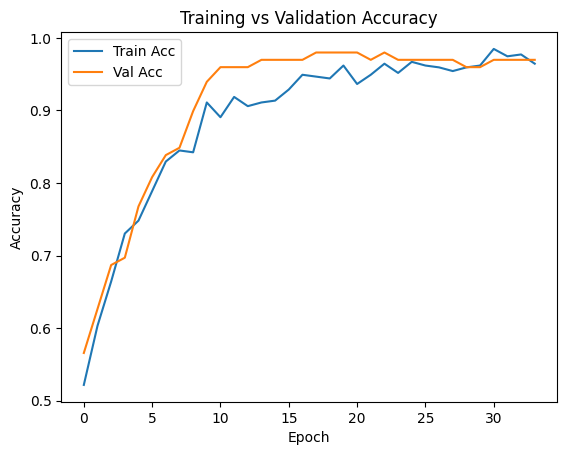

In [66]:
# Plot accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()


In [67]:
# Prediksi probabilitas
y_pred_proba = model.predict(X_test_scaled)

# Konversi ke kelas 0/1 dengan threshold 0.5
y_pred = (y_pred_proba > 0.5).astype(int).ravel()

print("Accuracy (Test):", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


4/4 [==============================] - 0s 3ms/step
Accuracy (Test): 0.9696969696969697

Classification Report:
               precision    recall  f1-score   support

       Tidak       0.94      0.97      0.95        32
          Ya       0.98      0.97      0.98        67

    accuracy                           0.97        99
   macro avg       0.96      0.97      0.97        99
weighted avg       0.97      0.97      0.97        99


Confusion Matrix:
 [[31  1]
 [ 2 65]]


## 6. Deployment

Pada tahap ini, model yang telah dilatih disimpan ke dalam file sehingga dapat
digunakan kembali pada aplikasi prediksi TBC tanpa perlu melatih ulang.

Objek yang disimpan:
- Model ANN (`.h5`)
- Scaler (`.pkl`) untuk standarisasi fitur
- LabelEncoder (`.pkl`) untuk mengubah label teks <-> angka

Ini memastikan bahwa proses preprocessing pada saat deployment konsisten
dengan saat training.


In [68]:
# Simpan model
model.save('model_tbc_ann.h5')

# Simpan scaler dan label encoder
import joblib

joblib.dump(scaler, 'scaler_tbc.pkl')
joblib.dump(le, 'labelencoder_tbc.pkl')

print("Model, scaler, dan label encoder berhasil disimpan.")


Model, scaler, dan label encoder berhasil disimpan.


/Users/alifnaufaly/Documents/tugas tb paru DL pake pkl/venv/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
